# Football Player Database | Top 5 Leagues


--Yorum(1)--

-> Burada kullanacağımız kütüphaneleri tanıttık. 
-> numpy: Veri manipülasyonu ve hesaplamalar için kullanılır.
-> pandas: Verileri tablo benzeri DataFrame'lerde saklamak için kullanılır.
-> seaborn ve matplotlib.pyplot: Bu kütüphaneler ise görselleştirme amaçlı kullanılır.
-> xgboost: XGBoost kütüphanesini içe aktarır. XGBoost, Gradient Boosting yöntemini kullanarak güçlü bir makine öğrenimi algoritmasıdır.

In [53]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


--Yorum(2)--

-> Buradaki kod pandas kütüphanesini kullanarak bir csv dosyasını DataFrame'ye dönüştürüyor.
-> pd.read_csv() fonksiyonu, belirtilen CSV dosyasını okuyarak içeriğini bir DataFrame'e dönüştürür ve df_players adında bir değişkene atar.
-> df_players.head() fonksiyonu, oluşturulan DataFrame'in ilk beş satırını ekrana basar. Bu, DataFrame'in yapısını ve verilerin nasıl göründüğünü anlamak için bir önizleme sağlar.

In [40]:
df_players = pd.read_csv('C:\\Users\\Emre\\Desktop\\archive\\top5_leagues_player.csv', index_col = [0])
df_players.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


--Yorum(3)--

-> DataFrame'in sayısal sütunlarının istatistiksel özetini hesaplar.
-> .T ifadesi, satırlar ile sütunların yer değiştirmesini sağlar. Bunu yapmaktaki amaç istatistiklerin daha okunur bir hale gelmesini sağlamaktır.

In [41]:
df_players.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2612.0,26.305513,4.645297,17.000,23.00,26.00,30.00,42.00
height,2601.0,1.830892,0.067255,1.630,1.78,1.83,1.88,2.06
price,2602.0,10.650711,15.773271,0.025,1.80,4.50,13.00,180.00
max_price,2606.0,17.304729,21.948577,0.025,3.50,10.00,22.00,200.00
shirt_nr,2612.0,20.495789,17.914206,1.000,8.00,17.00,27.00,99.00


--Yorum(4)--

-> Bu kod, df_players DataFrame'inin bir özetini sağlar ve DataFrame'in sütunlarının veri türleri, bellek kullanımı ve eksik değerler hakkında bilgi verir.

In [42]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 0 to 2611
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2612 non-null   object 
 1   full_name         1480 non-null   object 
 2   age               2612 non-null   int64  
 3   height            2601 non-null   float64
 4   nationality       2612 non-null   object 
 5   place_of_birth    2595 non-null   object 
 6   price             2602 non-null   float64
 7   max_price         2606 non-null   float64
 8   position          2612 non-null   object 
 9   shirt_nr          2612 non-null   int64  
 10  foot              2576 non-null   object 
 11  club              2612 non-null   object 
 12  contract_expires  2544 non-null   object 
 13  joined_club       2612 non-null   object 
 14  player_agent      2353 non-null   object 
 15  outfitter         1003 non-null   object 
 16  league            2612 non-null   object 


--Yorum(5)--

-> Burada eksik değerlerin olduğu sütunları tespit edip bunları yeni bir değişkene atıyorum.
-> Bu kodun amacı, df_players DataFrame'inin içinde eksik değerler içeren sütunları tespit etmek, bu sütunlara ait eksik değerleri içeren bir DataFrame oluşturmak ve eksik değerlerin sayısını hesaplamaktır. Bu bilgiler, veri setindeki eksik değerlerin durumunu değerlendirmek ve ilgili işlemleri yapmak için kullanılabilir.

In [43]:
empty_cols = df_players.columns[df_players.isna().any()].tolist()

df_isnull = df_players[empty_cols]

print(df_isnull.isnull().sum())

full_name           1132
height                11
place_of_birth        17
price                 10
max_price              6
foot                  36
contract_expires      68
player_agent         259
outfitter           1609
dtype: int64


--Yorum(6)--

-> Ardından veri setinde eksik değerleri olan sütunları çıkartıp kalan satır bigisini ekrana yazdırıyorum.
-> Bu kod, df_players DataFrame'inden belirli sütunlarda eksik değeri olan satırları çıkarır ve DataFrame'in yeni satır ve sütun sayısını döndürür.
-> subset kodu ile boş değeri olan sütunları seçiyoruz ve ilgili satırı DataFrame'den siliyoruz.
-> df_players.shape kodu ile DataFrame'in ilgili sütunların eksik satırları çıkarıldıktan sonra kalan satır ve sütun sayısını ekrana yazdırıyoruz. 

In [44]:
df_players = df_players.dropna(subset=['contract_expires', 'height', 'foot', 'price', 'max_price'])
df_players.shape

(2498, 17)

--Yorum(7)--

-> Bu kod, eksik değerlerimizin olduğu veri setindeki değerleri görselleştirmek için bir ısı haritası oluşturur.
-> df_isnull.isnull() DataFrame'inin üzerine bir ısı haritası oluşturulur. İkinci isnull() fonksiyonu, her eksik değer için True değerini 1 olarak temsil eden bir matris döndürür ve bu matris ısı haritası olarak görselleştirilir.

<Axes: >

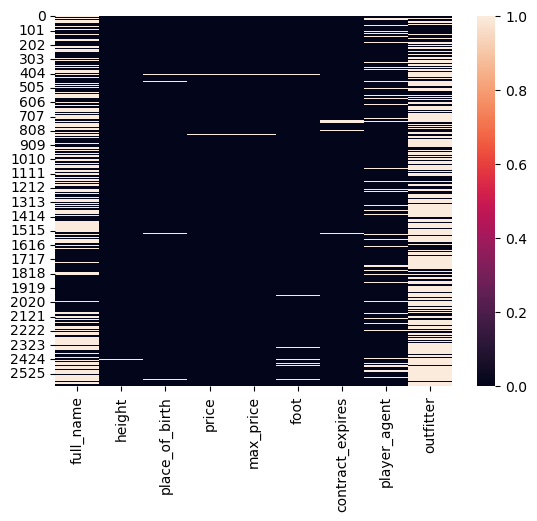

In [45]:
sns.heatmap(df_isnull.isnull()) 

--Yorum(8)--

-> Bu kod, eksik değerleri içeren DataFrame'deki 'outfitter' değerlerinin sayısını hesaplar ve bu değerleri bir çubuk grafikle görselleştirir. Ayrıca, x-ekseni etiketlerini 90 derece döndürür.
-> plt.figure(figsize=(8,5)) kodu yeni bir çizim alanı oluşturur ve bu alanın genişlik ve yüksekliğini belirtir. 

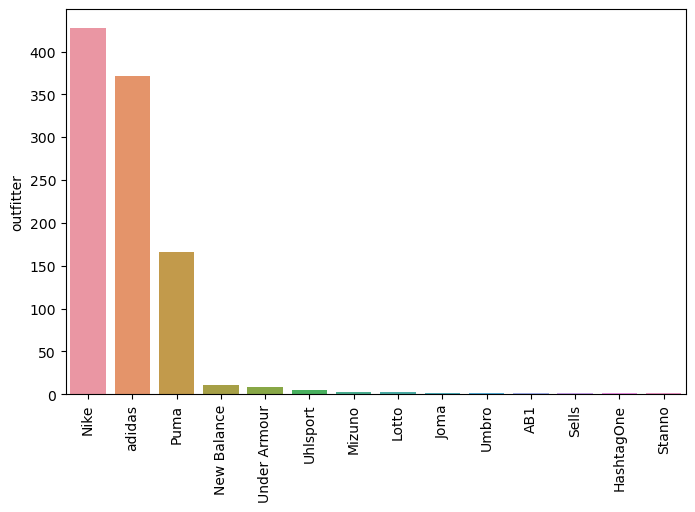

In [48]:
plt.figure(figsize=(8,5))

outfitter_counts = df_isnull['outfitter'].value_counts()
sns.barplot(data=df_isnull, x=outfitter_counts.index, y=outfitter_counts)

ax = plt.gca()
ax.tick_params(axis='x', labelrotation=90)

--Yorum(9)--

-> Bu kod, eksik değerleri içeren DataFrame'deki 'player_agent' sütunundaki farklı değerlerin sayısını hesaplar. Ardından, en çok ve en az görülen 10 değeri seçer ve bu değerleri çubuk grafikle görselleştirir.

<Axes: xlabel='player_agent'>

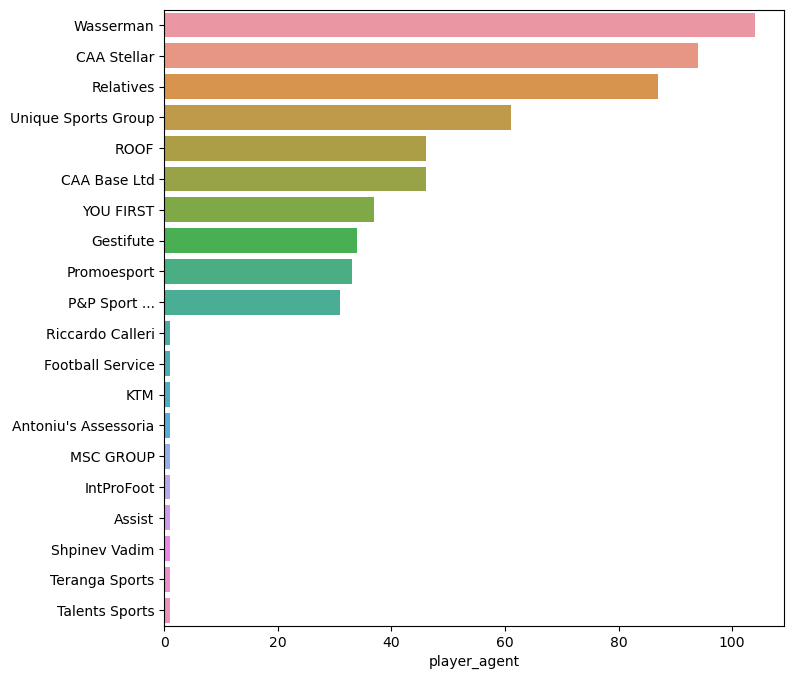

In [49]:
plt.figure(figsize=(8,8))

outfitter_counts = df_isnull['player_agent'].value_counts()

top_10 = outfitter_counts.head(10)
last_10 = outfitter_counts.tail(10)
plot_data = pd.concat([top_10, last_10])

sns.barplot(data=df_isnull, x=plot_data, y=plot_data.index)

--Yorum(10)--

-> Bu kodun amacı, DataFrame içerisindeki boş değerleri belirli bir yerine ("unknown" olarak) değiştirmektir. Böylece, eksik verilerin yerine geçici bir değer atanmış olur.

In [50]:
df_players = df_players.replace(np.nan, 'unknown')

In [51]:
df_players.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,unknown,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,unknown,EPL
2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


--Yorum(11)--

-> Bu kodun amacı, verilen DataFrame üzerinde belirli bir özellik (feature) bazında grafikler oluşturmak ve görsel analiz yapmaktır.

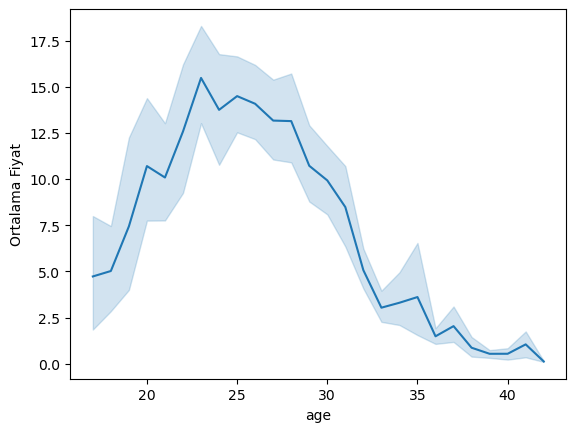

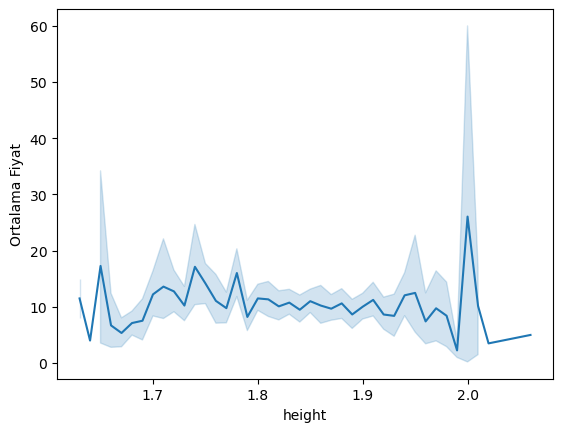

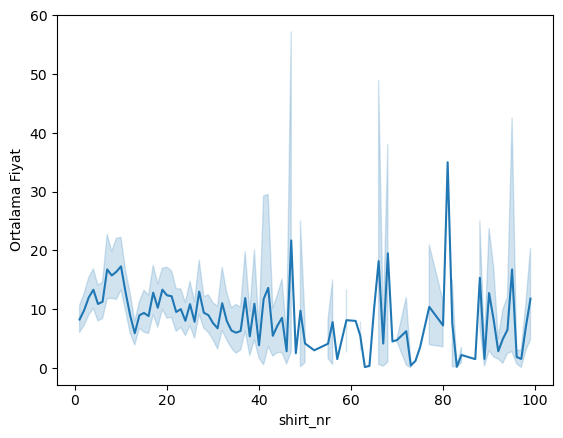

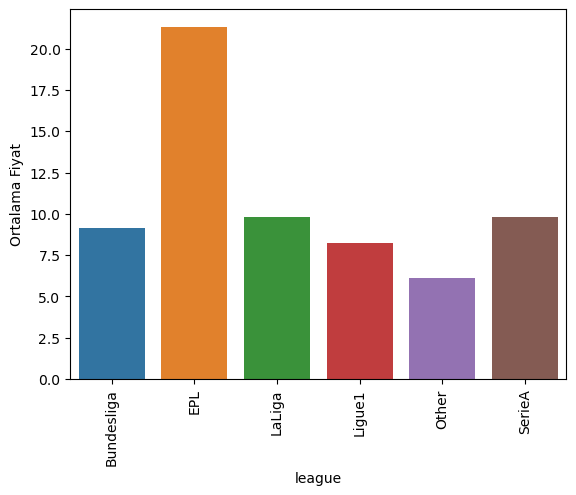

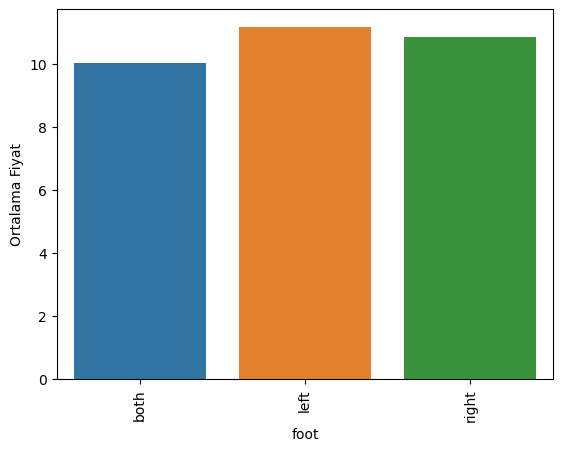

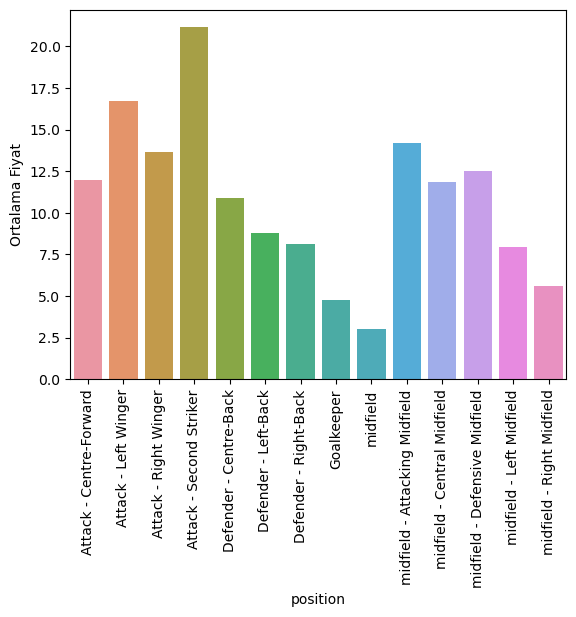

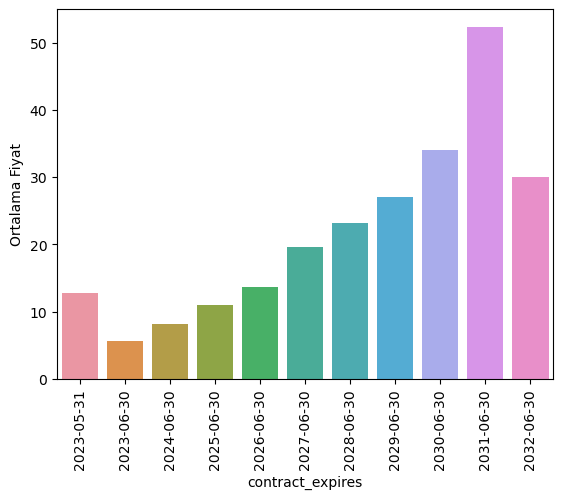

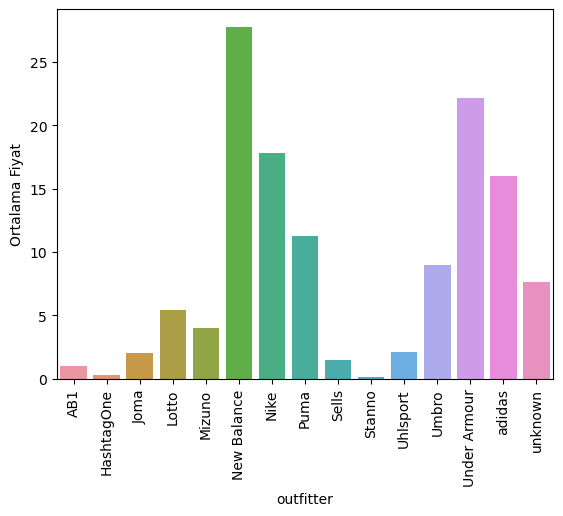

In [52]:
def plotting(df, feature):
    df_mean = df.groupby(feature)['price'].mean().reset_index()
    sns.barplot(data=df_mean, x=feature, y='price')

    ax = plt.gca()
    ax.tick_params(axis='x', labelrotation=90)
    plt.ylabel('Ortalama Fiyat')
    plt.show()

def plottingLine(df, feature):
    sns.lineplot(data=df, x=feature, y='price')
    plt.ylabel('Ortalama Fiyat')
    plt.show()
    

feature_list = ['league', 'foot', 'position', 'contract_expires', 'outfitter']

numarical_features = ['age', 'height', 'shirt_nr']

for feature in numarical_features:
    plottingLine(df_players, feature)

for feature in feature_list:
    plotting(df_players, feature)

--Yorum(12)--

-> Bu kodun amacı, DataFrame içerisindeki sayısal sütunlar arasındaki korelasyonları hesaplamak ve bu korelasyonları görsel olarak anlaşılabilir bir şekilde ısı haritası olarak göstermektir. Böylece, veri setindeki değişkenler arasındaki ilişkiler ve güçlü korelasyonlar daha anlaşılır olur.

<Axes: >

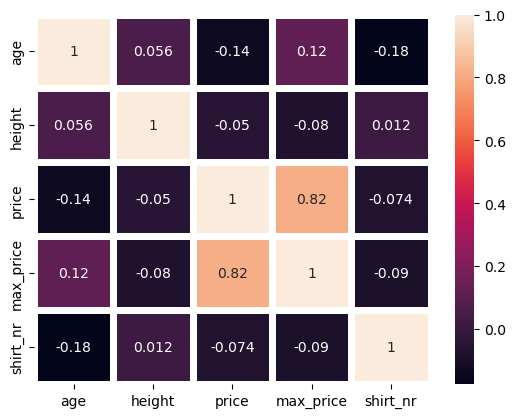

In [34]:
sns.heatmap(df_players.corr(numeric_only=True), annot=True, linewidth=5)

--Yorum(13)--

-> Bu kodun amacı, veri setini hedef değişken ve özellikler olmak üzere iki ayrı DataFrame'e bölmektir.
-> Bu bölme işlemi, veri setinin modelin eğitimi ve testi için kullanılacak bağımsız değişkenlerini ve hedef değişkenini ayırmak için yapılmaktadır. Model, df_features DataFrame'indeki özellikleri kullanarak df_target DataFrame'indeki hedef değişkeni tahmin etmeye çalışacaktır.

In [20]:
df_target = df_players[['price']]
df_features = df_players[['age', 'height', 'league','foot', 'position', 'club',
                        'contract_expires', 'joined_club', 'player_agent', 'outfitter', 'nationality']]

--Yorum(14)--

-> Bu kodun amacı, df_features DataFrame'inin her bir sütununda bulunan benzersiz değerleri belirlemek ve bu değerleri sütun adıyla birlikte ekrana yazdırmaktır. Böylece, her bir özellik sütununda hangi benzersiz değerlerin bulunduğunu görebilirsiniz.

In [21]:
for column in df_features.columns:
    unique_values = df_features[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'age': [29 30 37 26 28 27 22 32 18 20 31 21 23 19 38 24 33 25 36 35 34 41 39 17
 40 42]
Unique values in column 'height': [1.88 1.85 1.87 1.8  1.89 1.71 1.83 1.69 1.91 1.79 1.77 1.81 1.73 1.82
 1.95 1.7  1.94 1.86 1.93 1.92 1.78 1.9  1.75 1.72 1.74 1.96 1.84 1.97
 2.01 1.98 1.63 1.76 1.67 1.99 1.65 2.   1.68 1.66 2.02 1.64 2.06]
Unique values in column 'league': ['EPL' 'Other' 'Bundesliga' 'SerieA' 'LaLiga' 'Ligue1']
Unique values in column 'foot': ['left' 'right' 'both']
Unique values in column 'position': ['Goalkeeper' 'Defender - Centre-Back' 'Defender - Left-Back'
 'Defender - Right-Back' 'midfield - Defensive Midfield'
 'midfield - Central Midfield' 'midfield - Attacking Midfield'
 'Attack - Left Winger' 'Attack - Right Winger' 'Attack - Centre-Forward'
 'Attack - Second Striker' 'midfield - Left Midfield'
 'midfield - Right Midfield' 'midfield']
Unique values in column 'club': ['Man City' 'Chelsea' 'Chelsea U21' 'Arsenal' 'Liverpool' 'Man Utd'
 'Tottenham'

--Yorum(15)--

-> Burada kategorik özellikleri dönüştürerek, veri setini makine öğrenimi modellerine giriş olarak uygun hale getiriyoruz.

In [22]:
columns_to_encode = ['league' ,'foot', 'position', 'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter', 'nationality']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

df_features_encoded = ct.fit_transform(df_features)

df_features_encoded.shape

(2498, 1802)

--Yorum(16)--

-> Burada veri setini eğitim ve test için alt kümelerine bölüyoruz ve her birinin boyutunu belirliyoruz.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df_features_encoded, df_target, test_size = 0.3, random_state=22)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (1748, 1802)
x_test: (750, 1802)
y_train: (1748,)
y_test: (750,)


--Yorum(17)--

-> Grid Search yöntemini kullanarak XGBoost regresyon modelinin en iyi hiperparametrelerini buluyoruz ve bu parametrelerle en iyi modeli eğitiyoruz.

In [24]:
param_grid = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [0.03, 0.05],
              'max_depth': [4, 7],
              'min_child_weight': [2,3,4],
              'subsample': [0.5, 0.3],
              'colsample_bytree': [0.7],
              'n_estimators': [300]}

xgb = xgboost.XGBRegressor(objective= 'reg:linear')

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv = 4)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(grid_search.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)


--Yorum(18)--

-> Az önce bulduğumuz hiperparametre aramasının sonuçlarını görselleştirmektir. 
-> Grid Search yöntemiyle farklı hiperparametre kombinasyonlarının performansı ölçülmüş ve bu ölçümlerin sonuçları grid_search.cv_results_ sözlüğünde bulunmaktadır.

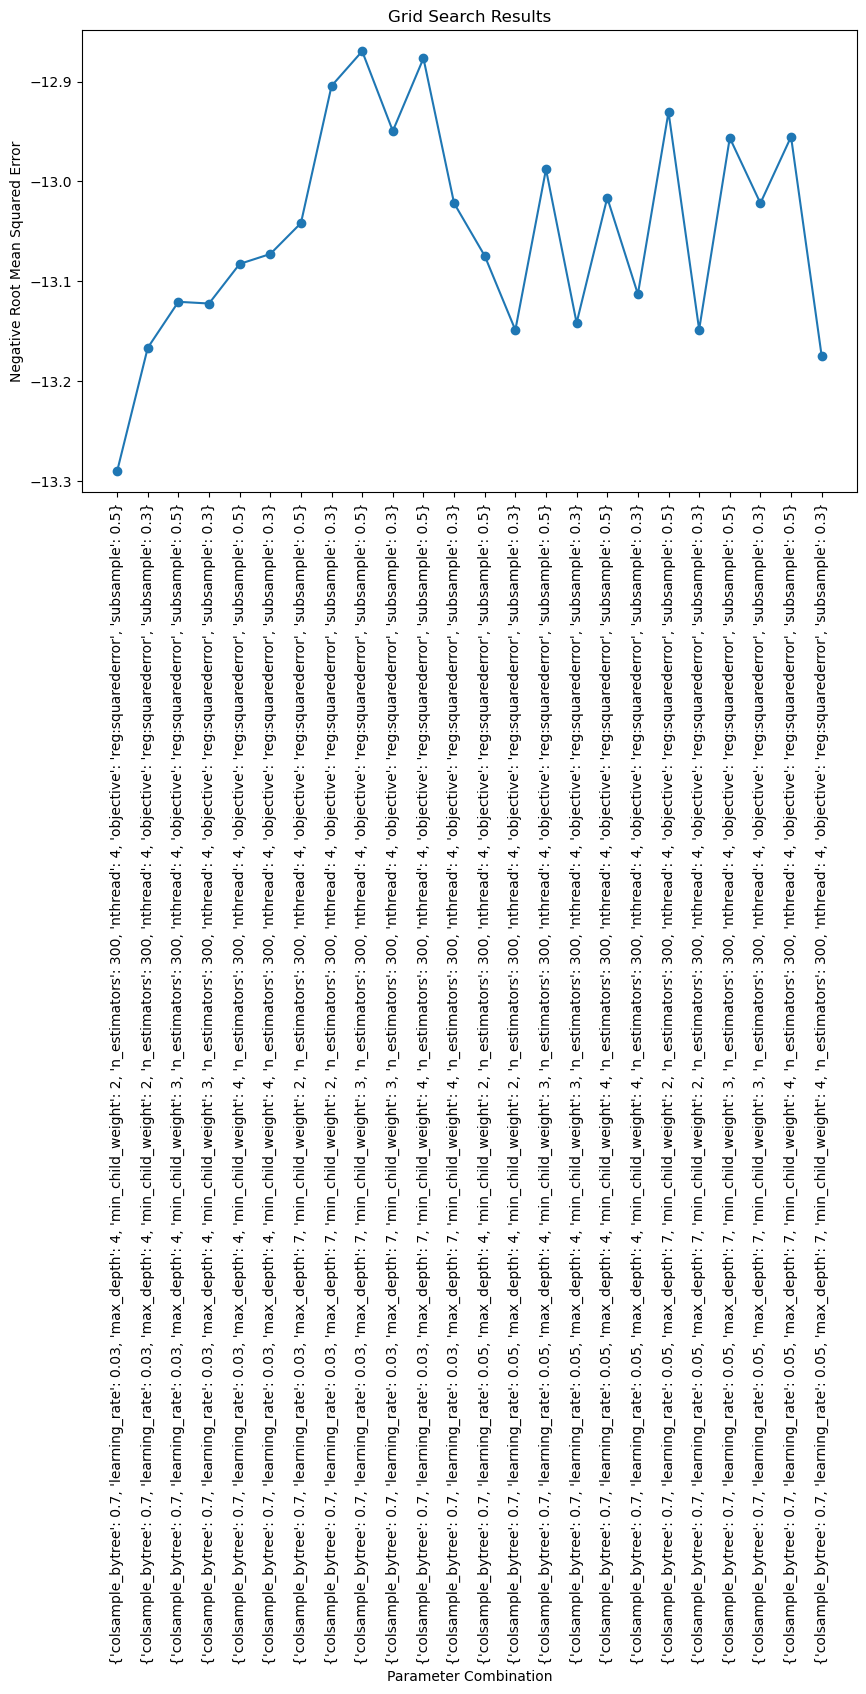

In [25]:
results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o')
plt.xlabel('Parameter Combination')
plt.ylabel('Negative Root Mean Squared Error')
plt.title('Grid Search Results')
plt.xticks(range(len(mean_scores)), params, rotation=90)
plt.show()

--Yorum(19)--

-> En iyi hiperparametre değerlerine sahip bir Regressor modeli oluşturarak, bu modele eğitim verilerini uygulayarak modele uygun bir şekilde eğitim yaptırıyoruz.

In [26]:
best_xgb = xgboost.XGBRegressor( **best_params)

best_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

--Yorum(20)--

-> Son olarak bu XGBRegressor modeli üzerinde test verilerini kullanarak tahminler yapıyoruz ve bu tahminlerin performansını değerlendiriyoruz.
-> predict metodu kullanılarak x_test verileri üzerinde tahminler yapılır ve bu tahminler pred değişkenine atanır.
-> Ardından, tahminlerin gerçek değerlerle karşılaştırılarak modelin performansı ölçülür. 
-> mean_absolute_error fonksiyonu kullanılarak ortalama mutlak hata hesaplanır. 
-> Son olarak hata ekrana yazdırılır.

In [27]:
pred = best_xgb.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mean absolute error: ',mae)
print('mean squared error: ',mse)
print('root mean squared error: ',rmse)

mean absolute error:  6.926829096972445
mean squared error:  134.74530216874018
root mean squared error:  11.607984414563115
